## Logistic Reggression

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## Load and Check Dataset

In [4]:
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df = pd.read_csv("test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.shape

(891, 12)

In [10]:
test_df.shape

(418, 11)

In [11]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## EDA

In [12]:
def bar_plot(variable):
    # get feature
    var = train_df[variable]
    # count number of categorical variable
    varValue = var.value_counts()
   
    # visualize
    plt.figure(figsize= (9, 3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    
    print("{}: \n{}".format(variable, varValue))

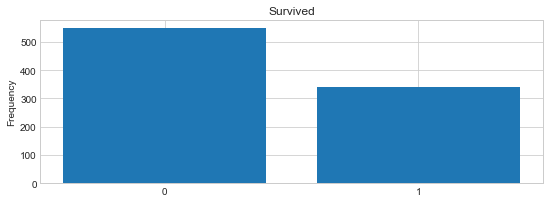

Survived: 
0    549
1    342
Name: Survived, dtype: int64


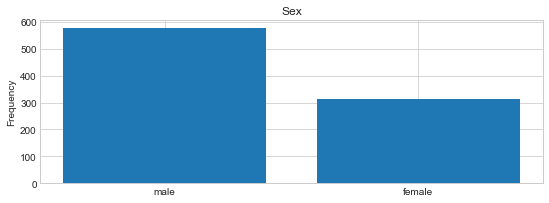

Sex: 
male      577
female    314
Name: Sex, dtype: int64


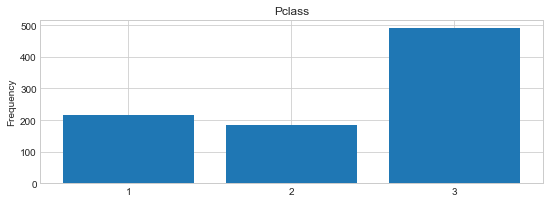

Pclass: 
3    491
1    216
2    184
Name: Pclass, dtype: int64


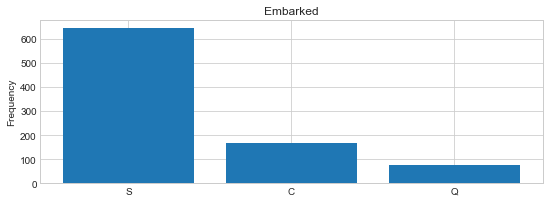

Embarked: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


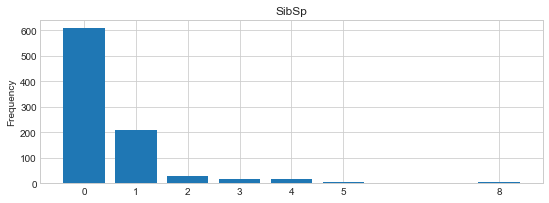

SibSp: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


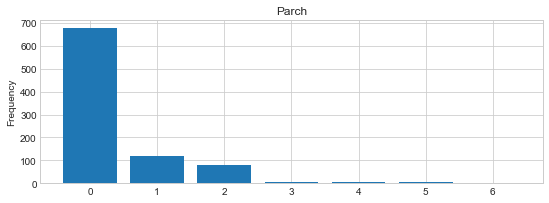

Parch: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [13]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

## Numerical Variable

In [14]:
def plot_hist(variable):
    plt.hist(train_df[variable],bins= 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

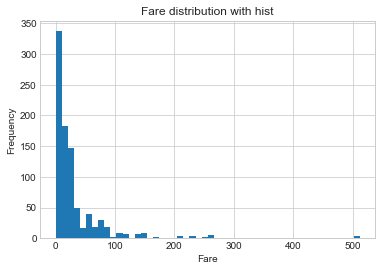

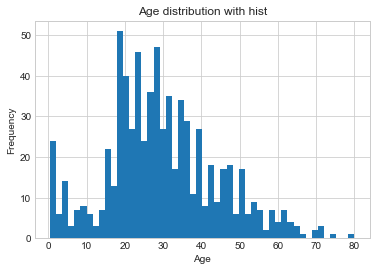

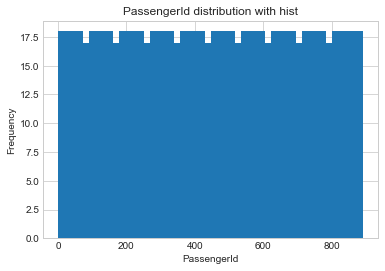

In [15]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

## Basic Data Analysis

In [16]:
# Pclass vs Survived
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by= "Survived", ascending= False) 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
# Sex vs Survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by= "Survived", ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
# SibSp vs Survived
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by= "Survived", ascending= False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
# Parch vs Survived
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by= "Survived", ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Outlier Detection

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile Q1
        Q1 = np.percentile(df[c], 25)
        # 3st quartile Q3
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [23]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [25]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop= True)

In [26]:
train_df.shape

(881, 12)

In [27]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Missing Values
    * find missing values
    * fill missing values

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
train_df_len = len(train_df)
train_df_len

881

In [33]:
train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop= True)

In [34]:
train_df.shape

(1299, 12)

In [35]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [36]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Fill Missing Values
    * Embarked has 2 missing values
    * fare has only 1

In [37]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


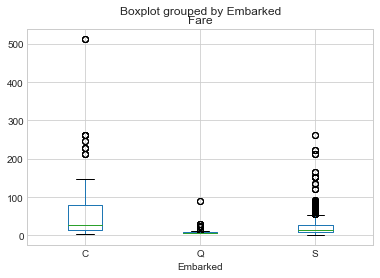

In [38]:
train_df.boxplot(column= "Fare", by= "Embarked")
plt.show()

In [39]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [40]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [41]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [42]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Visualization

correlatin between SibS -- Parch -- Age -- Fare -- Survived

In [43]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]

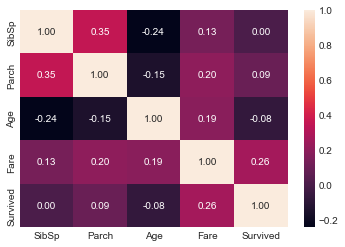

In [44]:
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

SibSp -- Survived

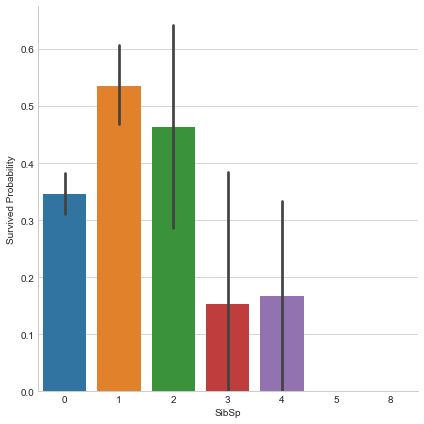

In [45]:
g = sns.factorplot( x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Parch -- Survived

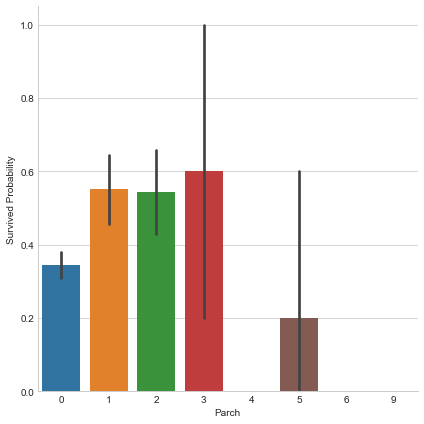

In [46]:
g = sns.factorplot( x = "Parch", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Pclass -- Survived

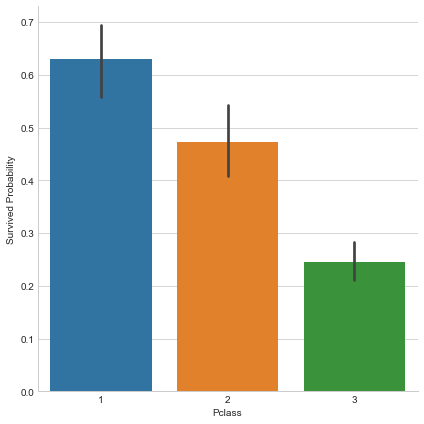

In [48]:
g = sns.factorplot( x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

## Age -- Survived

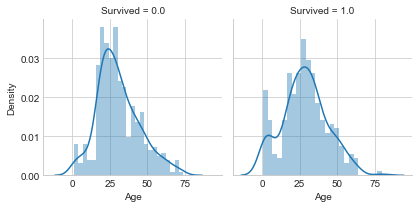

In [49]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins= 25)
plt.show()

## Fill Mİssing : Age Feature

In [50]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


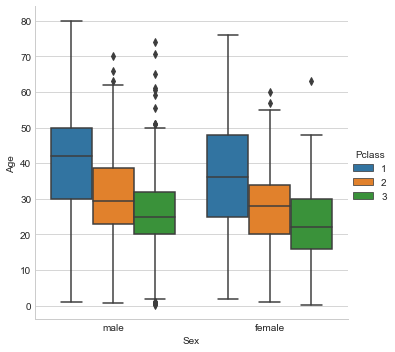

In [51]:
sns.factorplot(x = "Sex", y= "Age", hue= "Pclass", data = train_df, kind= "box")
plt.show()

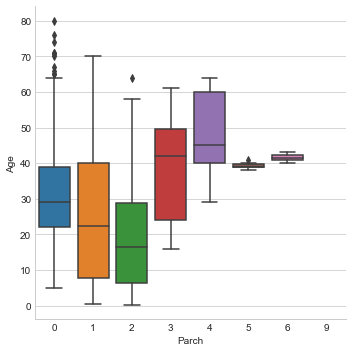

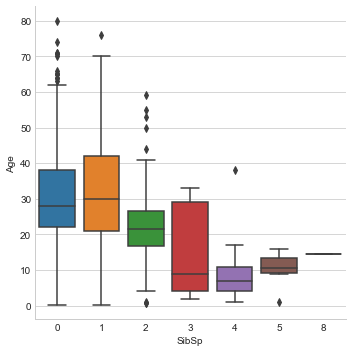

In [52]:
sns.factorplot(x= "Parch", y= "Age", data= train_df, kind = "box")
sns.factorplot(x = "SibSp", y= "Age", data = train_df, kind = "box")
plt.show()

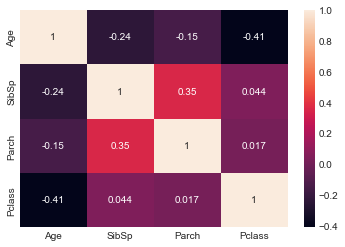

In [53]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot= True)
plt.show()

yaş cinsiyetle ilişkili değil, fakat parch, sibsp ve pclass

In [55]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [56]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Feature Engineering

In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
train_df.drop(labels = ["PassengerId", "Cabin", "Ticket", "Name"], axis= 1, inplace= True)

In [59]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [60]:
train_df.Sex

0         male
1       female
2       female
3       female
4         male
         ...  
1294      male
1295    female
1296      male
1297      male
1298      male
Name: Sex, Length: 1299, dtype: object

In [61]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Sex"])
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0.0,3,22.0,1,0,7.2500,S,0,1
1,1.0,1,38.0,1,0,71.2833,C,1,0
2,1.0,3,26.0,0,0,7.9250,S,1,0
3,1.0,1,35.0,1,0,53.1000,S,1,0
4,0.0,3,35.0,0,0,8.0500,S,0,1


## Embarked

In [62]:
train_df["Embarked"] = train_df["Embarked"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Embarked"])
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,1,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,0,0,1


##  Modeling

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.linear_model import LogisticRegression

## Train - Test split

In [65]:
train_df_len

881

In [66]:
train_df.shape

(1299, 11)

In [67]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"], axis = 1, inplace = True)

In [68]:
test.shape

(418, 10)

In [69]:
train_df.shape

(1299, 11)

In [70]:
train= train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis= 1)
y_train = train["Survived"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.2, random_state= 42)
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(test))

X_train 704
X_test 177
y_train 704
y_test 177
test 418


In [72]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print("test", test.shape)

X_train (704, 10)
X_test (177, 10)
y_train (704,)
y_test (177,)
test (418, 10)


In [73]:
y_train

235    0.0
359    1.0
548    0.0
259    0.0
772    1.0
      ... 
106    0.0
270    1.0
860    0.0
435    0.0
102    0.0
Name: Survived, Length: 704, dtype: float64

In [74]:
y_test

350    0.0
254    1.0
490    0.0
688    0.0
393    1.0
      ... 
398    0.0
783    0.0
408    0.0
352    1.0
81     1.0
Name: Survived, Length: 177, dtype: float64

In [75]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
235,3,25.0,1,0,14.4542,1,0,1,0,0
359,1,60.0,1,0,75.2500,1,0,1,0,0
548,1,62.0,0,0,26.5500,0,1,0,0,1
259,3,25.0,0,0,7.7500,1,0,0,1,0
772,1,43.0,0,1,211.3375,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,38.0,0,0,7.8958,0,1,0,0,1
270,1,63.0,1,0,77.9583,1,0,0,0,1
860,3,26.0,0,0,7.8958,0,1,0,0,1
435,3,25.0,1,0,7.7750,0,1,0,0,1


In [76]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
350,2,38.0,0,0,13.0000,1,0,0,0,1
254,2,50.0,0,1,26.0000,1,0,0,0,1
490,3,25.0,0,0,15.1000,0,1,0,0,1
688,2,52.0,0,0,13.5000,0,1,0,0,1
393,3,39.0,0,0,7.9250,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
398,2,34.0,1,0,21.0000,0,1,0,0,1
783,3,25.0,0,0,7.7500,0,1,0,1,0
408,3,25.0,0,0,8.0500,1,0,0,0,1
352,3,25.0,0,0,7.8792,1,0,0,1,0


In [91]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [92]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [93]:
X_train

array([[ 0.81467354, -0.31427378,  0.65832693, ...,  2.15220817,
        -0.31622777, -1.65071734],
       [-1.60528499,  2.29875333,  0.65832693, ...,  2.15220817,
        -0.31622777, -1.65071734],
       [-1.60528499,  2.44806917, -0.51499499, ..., -0.46463907,
        -0.31622777,  0.60579724],
       ...,
       [ 0.81467354, -0.23961586, -0.51499499, ..., -0.46463907,
        -0.31622777,  0.60579724],
       [ 0.81467354, -0.31427378,  0.65832693, ..., -0.46463907,
        -0.31622777,  0.60579724],
       [ 0.81467354,  0.58162123,  1.83164886, ..., -0.46463907,
        -0.31622777,  0.60579724]])

In [94]:
X_test

array([[-0.39530573,  0.65627915, -0.51499499, ..., -0.46463907,
        -0.31622777,  0.60579724],
       [-0.39530573,  1.55217416, -0.51499499, ..., -0.46463907,
        -0.31622777,  0.60579724],
       [ 0.81467354, -0.31427378, -0.51499499, ..., -0.46463907,
        -0.31622777,  0.60579724],
       ...,
       [ 0.81467354, -0.31427378, -0.51499499, ..., -0.46463907,
        -0.31622777,  0.60579724],
       [ 0.81467354, -0.31427378, -0.51499499, ..., -0.46463907,
         3.16227766, -1.65071734],
       [ 0.81467354, -0.31427378, -0.51499499, ..., -0.46463907,
         3.16227766, -1.65071734]])

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
log_model = LogisticRegression()

In [112]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [113]:
log_model.coef_

array([[-1.0254608 , -0.63480211, -0.2735764 , -0.04272409,  0.01019697,
         0.6385135 , -0.6385135 ,  0.12652776,  0.04246589, -0.13665295]])

In [114]:
log_model.intercept_

array([-0.65647646])

In [115]:
# y = -0.66 - 1.03 * Pclass - 0.64 * Age -0.27*SibSp -0.042*Parch + 0.01*Fare + 0.63 * Sex_0 - 0.63* Sex_1 + 0.12*Embarked_C + 0.04 * Embarked_Q - 0.13 *  Embarked_S

In [116]:
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [117]:
y_pred = log_model.predict(X_test)
y_pred

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1.])

In [118]:
y_train_pred = log_model.predict(X_train)

In [119]:
y_train_pred

array([1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [120]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

Precision quantifies the number of positive class predictions that actually belong to the positive class.
Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
F-Measure provides a single score that balances both the concerns of precision and recall in one number.

accuracy_score = R2_score

In [121]:
accuracy_score(y_test, y_pred)

0.7909604519774012

In [122]:
accuracy_score(y_train, y_train_pred)

0.8039772727272727

In [123]:
precision_score(y_test, y_pred)

0.7297297297297297

In [124]:
precision_score(y_train, y_train_pred)

0.7651821862348178

In [125]:
recall_score(y_test, y_pred)

0.7605633802816901

In [126]:
recall_score(y_train, y_train_pred)

0.7026022304832714

In [127]:
f1_score(y_test, y_pred, average = "weighted")

0.7916226462229108

In [128]:
f1_score(y_train, y_train_pred, average = "weighted")

0.802215814285308

In [129]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [130]:
confusion_matrix(y_test, y_pred)

array([[86, 20],
       [17, 54]])

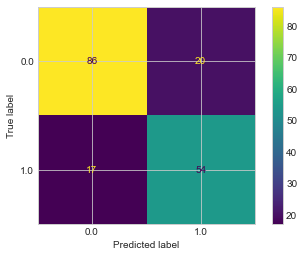

In [131]:
plot_confusion_matrix(log_model, X_test, y_test)

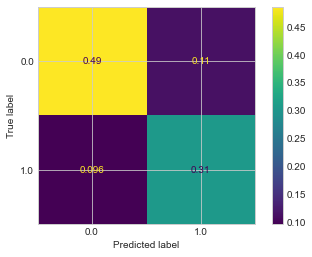

In [132]:
plot_confusion_matrix(log_model, X_test, y_test, normalize= "all")

In [133]:
f1_score(y_test, y_pred, average = "weighted")

0.7916226462229108

In [134]:
f1_score(y_train, y_train_pred, average = "weighted")

0.802215814285308

In [135]:
from sklearn.model_selection import cross_val_score, cross_validate

In [136]:
model = LogisticRegression()

In [137]:
scores = cross_val_score(model, X_train, y_train, cv= 10)
print("Cross- validation mean of accuracy scores", scores.mean())
print("")
print(scores)

Cross- validation mean of accuracy scores 0.795271629778672

[0.8028169  0.84507042 0.88732394 0.77464789 0.8        0.75714286
 0.74285714 0.81428571 0.72857143 0.8       ]


In [138]:
scores = cross_val_score(model, X_test, y_test, cv= 10)
print("Cross- validation mean of accuracy scores", scores.mean())
print("")
print(scores)

Cross- validation mean of accuracy scores 0.7620915032679738

[0.72222222 0.77777778 0.77777778 0.77777778 0.83333333 0.83333333
 0.72222222 0.88235294 0.58823529 0.70588235]


In [139]:
model = LogisticRegression()

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", 
                                                               "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index= range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.005055,0.003615,0.802817,0.802817,0.802817,0.802817
2,0.004044,0.003169,0.845070,0.844240,0.845070,0.844479
3,0.003897,0.003040,0.887324,0.887006,0.887324,0.886409
4,0.003648,0.002777,0.774648,0.778695,0.774648,0.776052
5,0.003513,0.002705,0.800000,0.797727,0.800000,0.796014
6,0.003097,0.002765,0.757143,0.753960,0.757143,0.754093
7,0.003708,0.002626,0.742857,0.741914,0.742857,0.731439
8,0.003322,0.002765,0.814286,0.813262,0.814286,0.813601
9,0.003467,0.002557,0.728571,0.735714,0.728571,0.730809
10,0.003683,0.002718,0.800000,0.801166,0.800000,0.794022


In [140]:
df_scores.mean()[2:]

test_accuracy              0.795272
test_precision_weighted    0.795650
test_recall_weighted       0.795272
test_f1_weighted           0.792974
dtype: float64

In [141]:
model = LogisticRegression()

scores = cross_validate(model, X_test, y_test, scoring = ["accuracy", "precision_weighted", "recall_weighted", 
                                                               "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index= range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.006093,0.003365,0.722222,0.717593,0.722222,0.717577
2,0.004334,0.003220,0.777778,0.777778,0.777778,0.777778
3,0.003985,0.003226,0.777778,0.781197,0.777778,0.768519
4,0.004131,0.002890,0.777778,0.777778,0.777778,0.777778
5,0.003246,0.002761,0.833333,0.841667,0.833333,0.834921
6,0.003424,0.002679,0.833333,0.833333,0.833333,0.830546
7,0.003364,0.003278,0.722222,0.721501,0.722222,0.719577
8,0.003477,0.002638,0.882353,0.882353,0.882353,0.882353
9,0.003585,0.002626,0.588235,0.580214,0.588235,0.582202
10,0.003404,0.002667,0.705882,0.716063,0.705882,0.684957


In [142]:
df_scores.mean()[2:]

test_accuracy              0.762092
test_precision_weighted    0.762948
test_recall_weighted       0.762092
test_f1_weighted           0.757621
dtype: float64

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       106
         1.0       0.73      0.76      0.74        71

    accuracy                           0.79       177
   macro avg       0.78      0.79      0.78       177
weighted avg       0.79      0.79      0.79       177



In [145]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       435
         1.0       0.77      0.70      0.73       269

    accuracy                           0.80       704
   macro avg       0.80      0.78      0.79       704
weighted avg       0.80      0.80      0.80       704

